<a href="https://colab.research.google.com/github/biparnakroy/Shitty-bots/blob/master/moxa_2_1_HACK_ON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MOXA**

### **Problem Statement**
With 413,467 confirmed cases, 197 countries under the attack of COVID-19. Maintaining sanity and hygiene remains the only way to prevent and fight the spreading of this deadly virus and making every individual aware of their sanitary health and ongoing COVID-19 epidemic and the upcoming epidemics.

### **EXISTING SOLUTION**
As suggested by medical practitioners, it is a necessity to wear a mask whenever you are at public places or places with probability of people gathering to prevent the spread of the virus if you are a carrier and even if not, it is safe to wear the mask. Till now the only way of monitoring the people if they are wearing the mask was manual.
 
### **Proposed Solution**

Hence to overcome this cumbersome process of manual monitoring of people wearing masks. We designed a real time monitoring technology to detect people wearing medical masks which can be done with the help of image processing, and deep learning. We have come up with an easily adaptable model which can detect the people wearing masks from the images or live feed fed to it. This can be used to classify places with higher or lower chances of transmission in case an active carrier enters that place and hence required measures can be taken to aware people of the emergency.



# **Working**
We are training a custom dataset on YoloV3 to detect the masks, hence we are making use of the darknet repository.

In [0]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Changing the makefile to have GPU and OPENCV enable

In [0]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [0]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

Buildng the darknet layers with ```!make``` command

In [0]:
# make darknet (build)
!make

Making some helper functions to upload images to test, and to display the perdictions. 
```imShow()  upload() download()``` 




In [0]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

### Linking google drive to VM
Your google should have a directory called ``` moxa ``` with the following files in it. 


```
1) moxa.cfg
2) obj.names
3) obj.data
4) moxa.weights
```
### Follow the instructions given in the github repo 
https://github.com/Shitty-bots-Inc/Moxa_online_testing/edit/master

And mount google drive in your VM by running the following cell


In [0]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

this cell creates a symbolic link so that now the path ```/content/gdrive/My\ Drive/``` is equal to ```/mydrive```

In [0]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Changing  the directory back to ``` darknet```

In [0]:
%cd darknet

Upload ```moxa.cfg``` from the google drive to VM 

In [0]:
# upload the moxa .cfg  to cloud VM from Google Drive
!cp /mydrive/moxa/moxa.cfg ./cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd .. 

Upload ``` obj.names``` and ```obj.data``` to ```./darknet/data``` directory by running the 

In [0]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/moxa/obj.names ./data
!cp /mydrive/moxa/obj.data  ./data

# upload the obj.names and obj.data files to cloud VM from local machine (uncomment to use)
#%cd data
#upload()
#%cd .. 

# Runing our mask Detector!!!


In [0]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' moxa.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' moxa.cfg
%cd ..


###Using the web cam to run the detections on !!!!

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Click on the ```capture``` button to run the detections on

<IPython.core.display.Javascript object>

Saved to photo.jpg
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 600, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

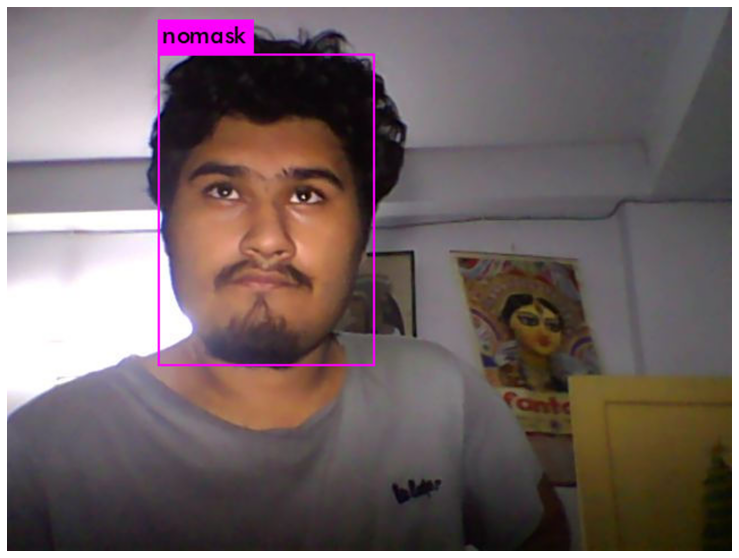

No image data found. Expecting filename, url, or data.


In [13]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  !./darknet detector test data/obj.data cfg/moxa.cfg /mydrive/moxa/moxa.weights photo.jpg -thresh 0.3
  
  # Show the image which was just taken.
  display(Image(imShow('predictions.jpg')))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Now, this model can also be
used with a video further extending its applications. One such application that we had in
mind while building this, was CCTV cameras, outputting real-time videos could be used with
our model to detect if the people in those areas are wearing masks or not.
Places such as banks, hospitals, government sectors, and even some traffic monitoring
systems come with CCTV cameras pre-installed. These are areas which receive a high
density of footfall, and thus become active sources of transmission. It is absolutely essential
that people use medical masks in these areas. If we use our model here, we can easily spot
people without masks in a shorter time further we can find the ratio of people wearing masks to people not wearing the masks, thereby notifying the areas which fall below the threshold value. Hence, making the entire process efficient.


#WHY MOXA?

##HIGHLY EFFECTIVE MODEL
It is humanly not possible to monitor thousands of people at all times to ensure whether they are wearing a mask or not. Even to achieve 10% of this goal we would need huge man power, which is not feasible to arrange in this situation. But with our system we can continuously monitor large volumes of people with even a small team working remotely, and store the demographic information which could be very helpful in mitigation of this situation.

##COST EFFECTIVE
Our model is extremely cost effective. As it is primarily dependent on the cameras that are pre installed so the hardware requirement of this model is minimal.

#FUTURE PLANS
As of now our neural network has been trained on the Kaggle dataset of medical masks, with a larger dataset we plan to further improve the performance and accuracy of this model.
We also plan to build an identification layer to find exactly the person not wearing the masks, and storing the information in the database, primarily based on office applications.
We can use this technology to monitor the industrial areas also as it is highly recommended to use masks in those conditions which expands the projects usage further more from the current COVID-19 pandemic. Similarly, this can also be extended to medical facilities, pharmaceutical and food sector industries that require high hygienic conditions.

-Shitty Bots
